In [6]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def plot_spectrogram(Y, sr, hop_length, filePath, fileName, y_axis="linear"):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(Y,
                            sr=sr,
                            hop_length=hop_length,
                            x_axis="time",
                            y_axis=y_axis)
    #plt.colorbar(format="%+2.f")
    plt.gray()
    plt.savefig(os.path.join(filePath, fileName+'.png'), bbox_inches='tight')

In [22]:
def Spectrogramify(classification, filePath):
    audio, sr = librosa.load(filePath)
    FRAME_SIZE = 2048 #SAMPLE SIZE
    HOP_SIZE = 512 #SAMPLES
    S_audio = librosa.stft(audio, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
    Y_audio = np.abs(S_audio) ** 2
    Y_log_audio = librosa.power_to_db(Y_audio)
    plot_spectrogram(Y_log_audio, sr, HOP_SIZE, os.path.join('Spectrograms/training', classification), 
                     os.path.basename(filePath).split('/')[-1].split('.')[0], y_axis="log")

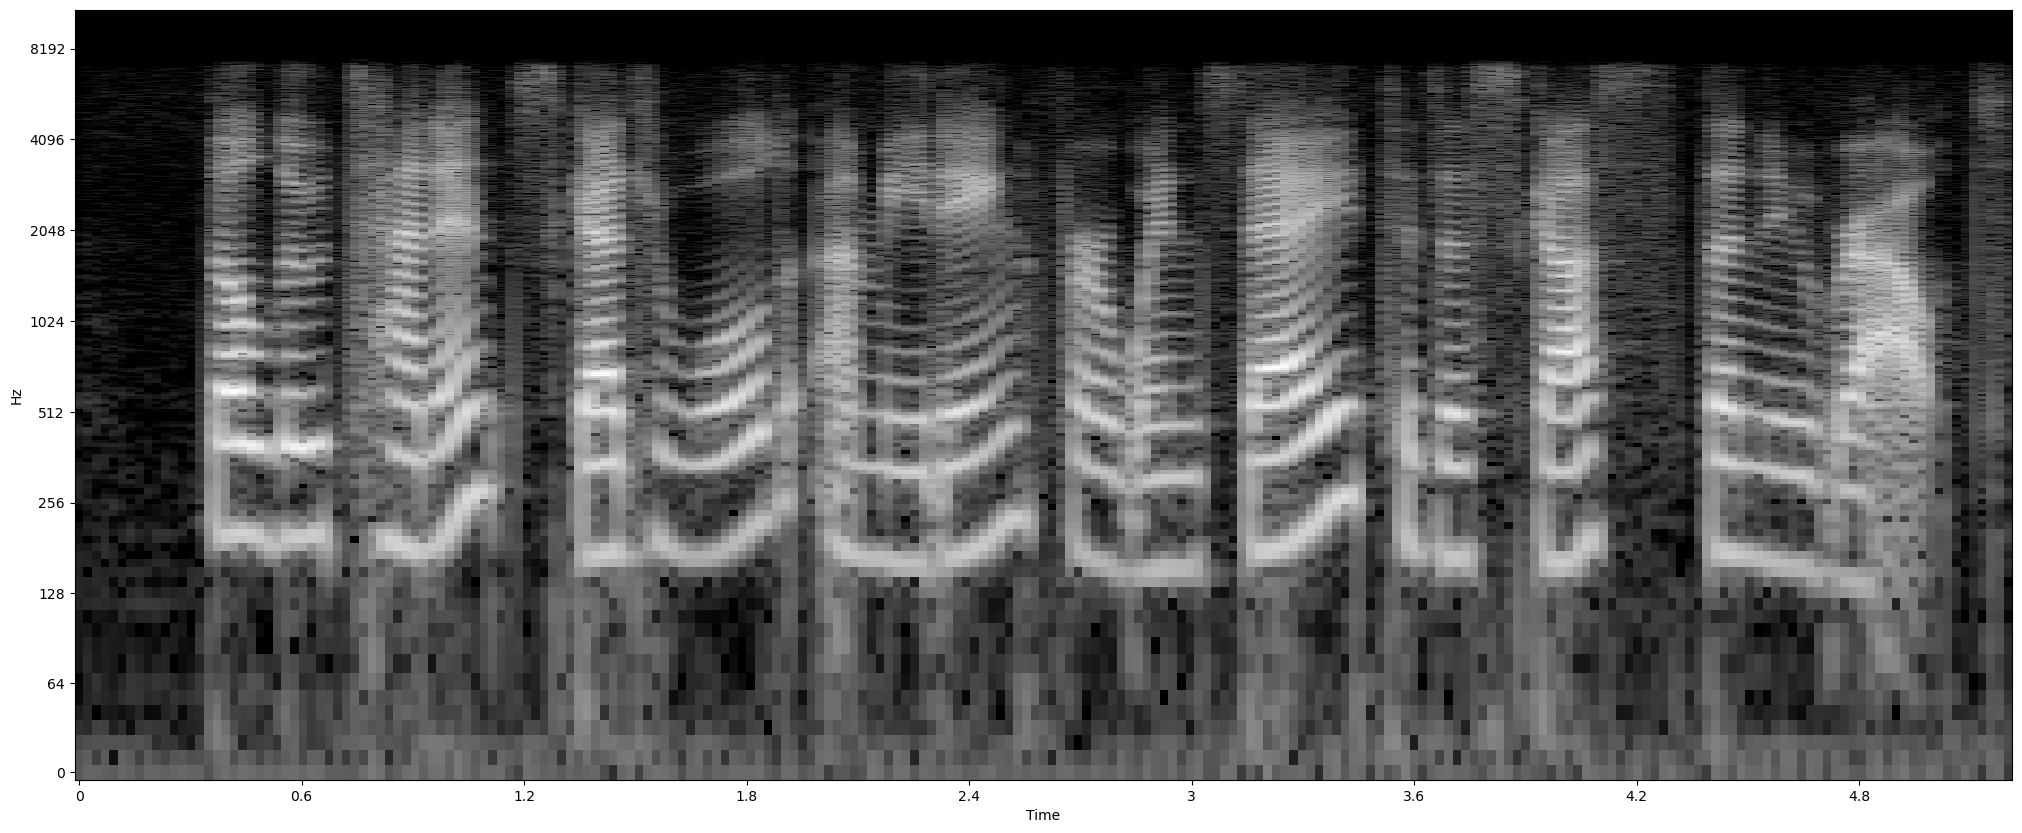

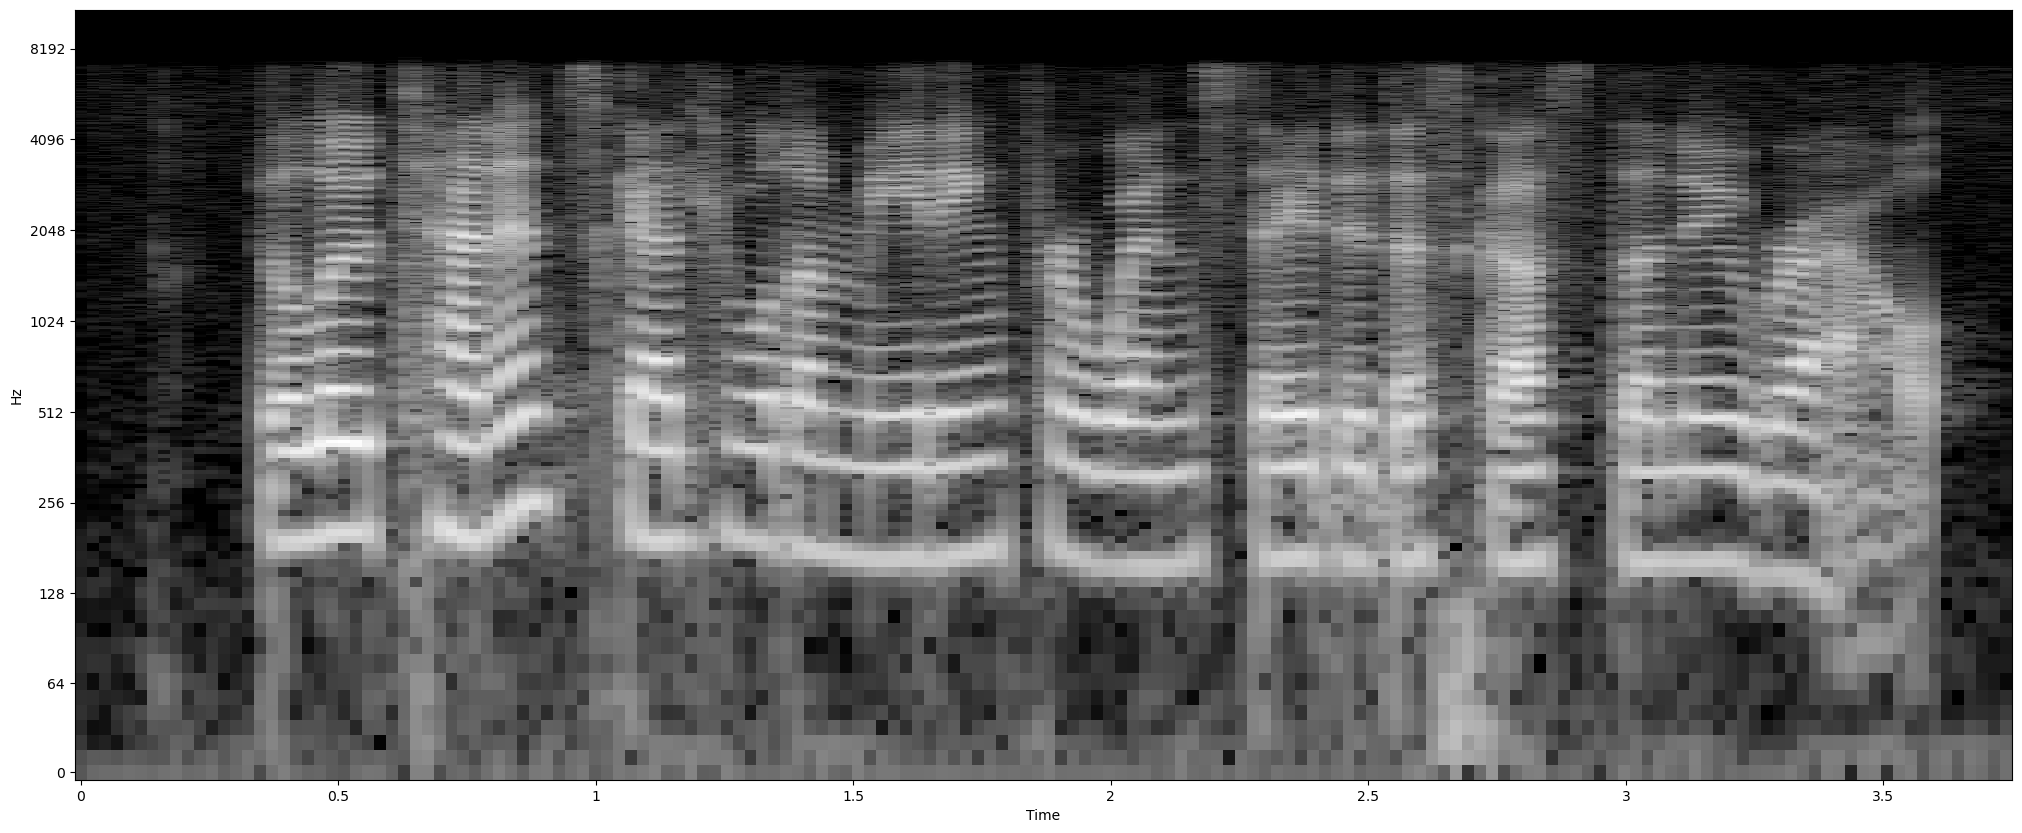

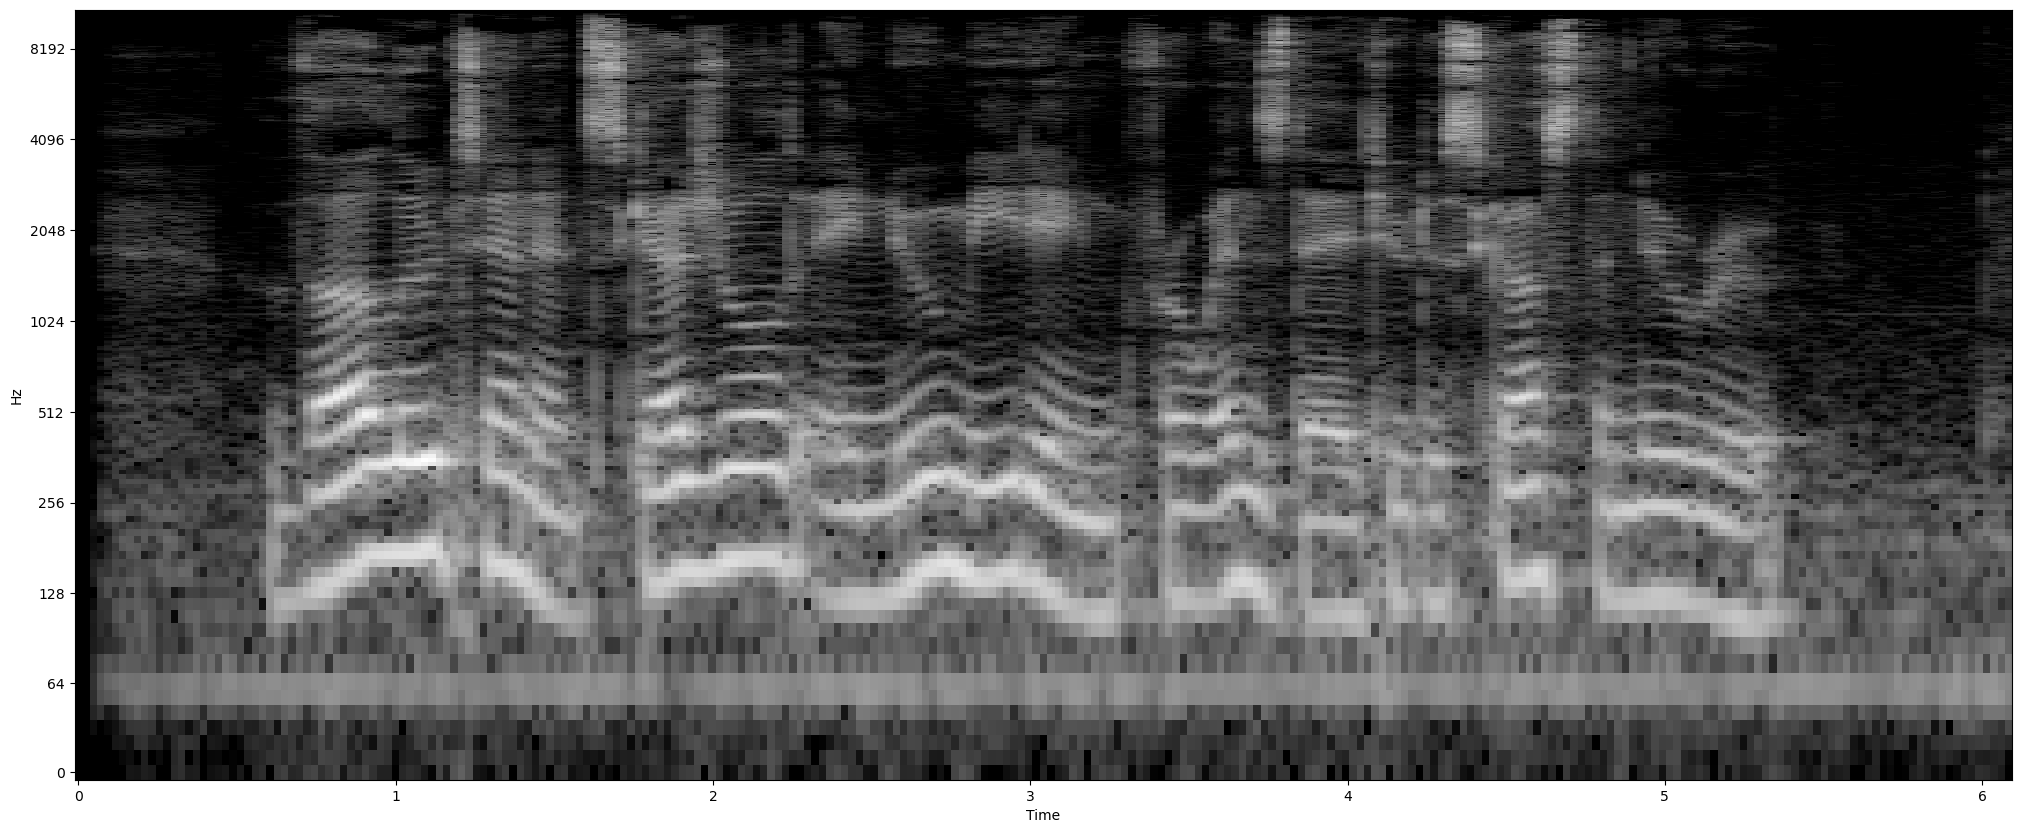

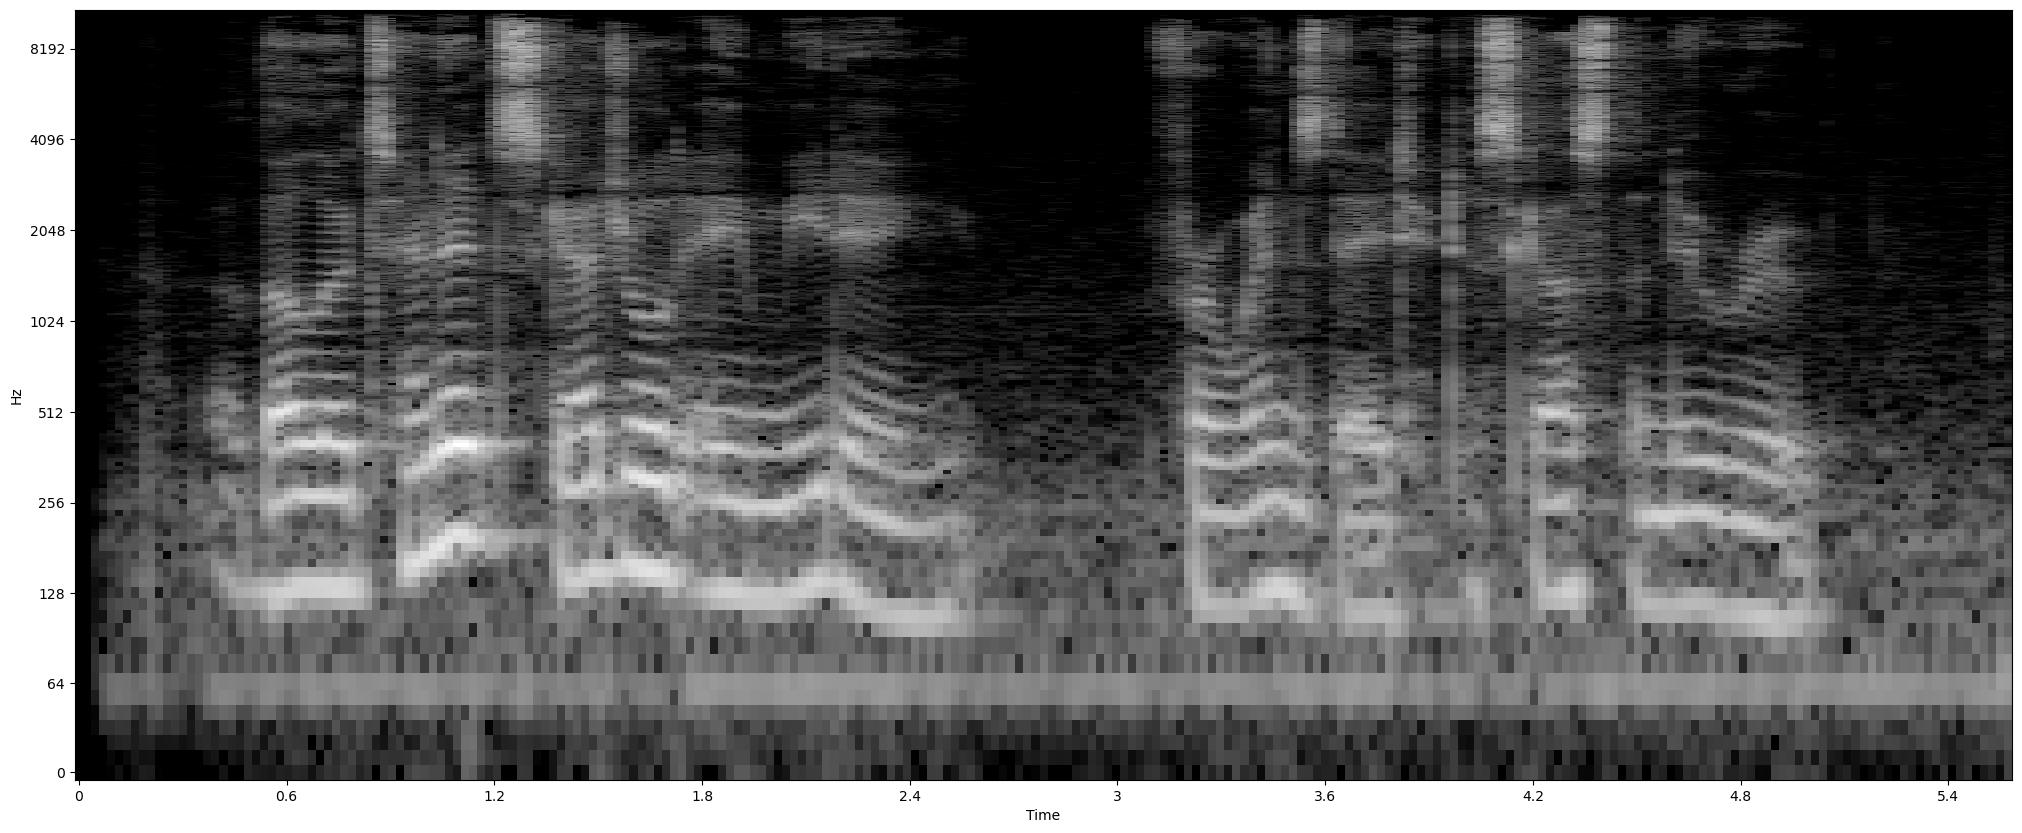

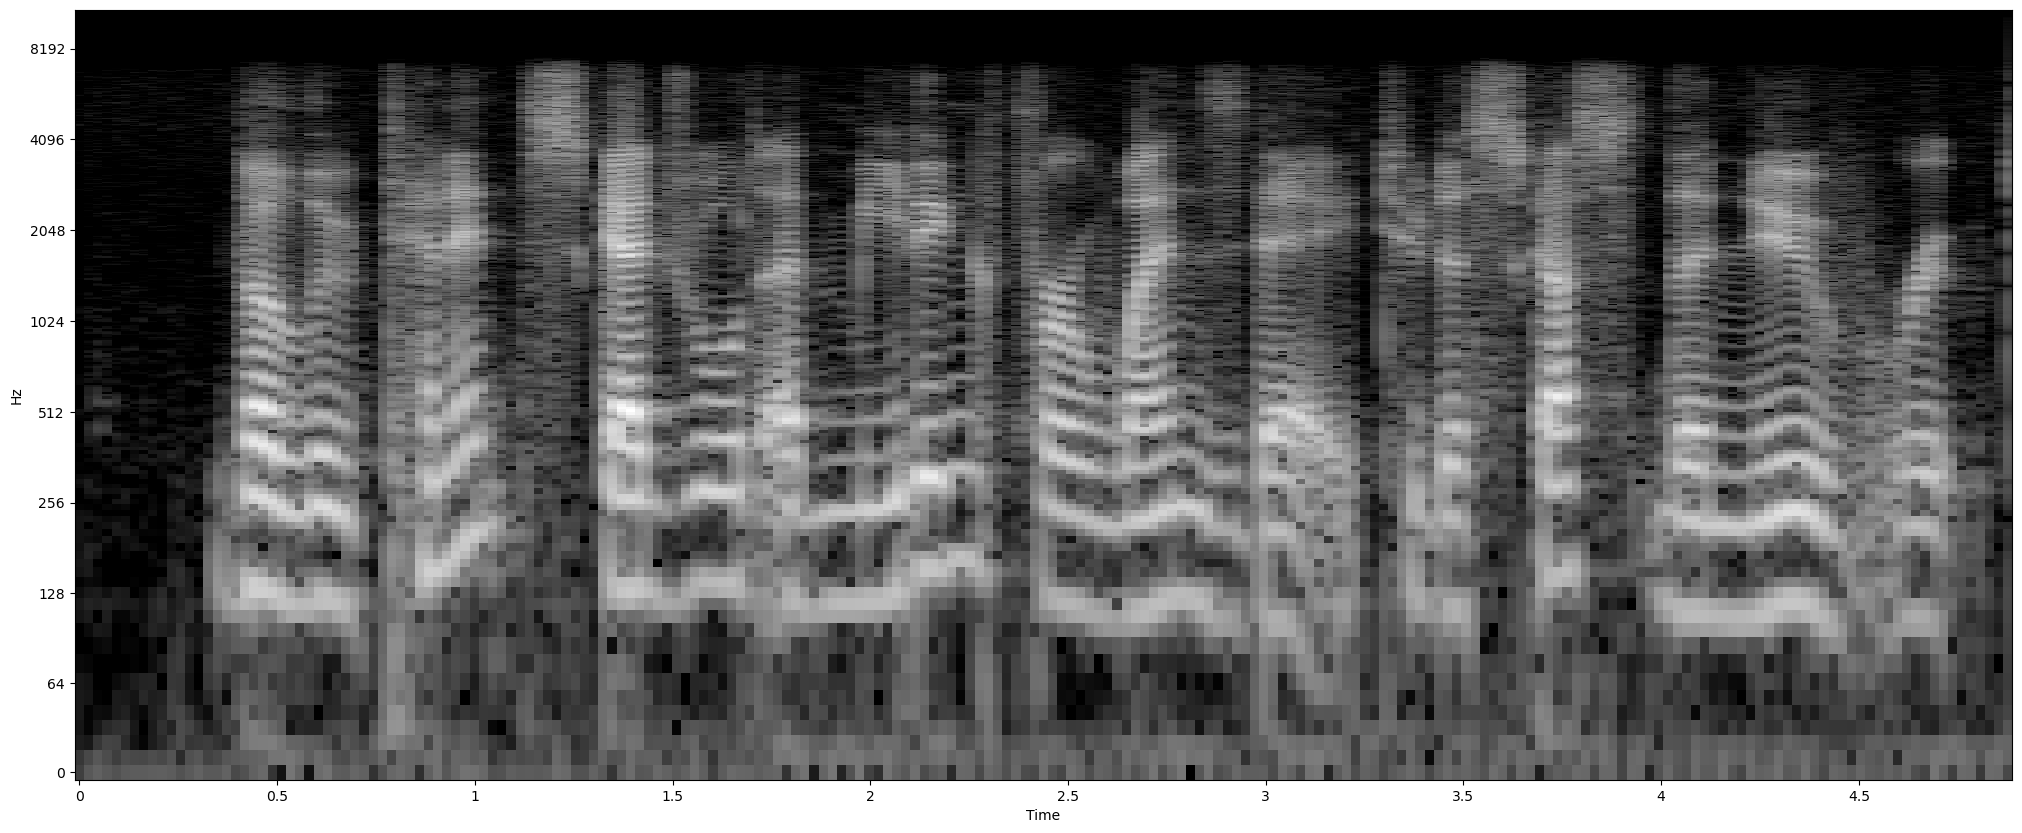

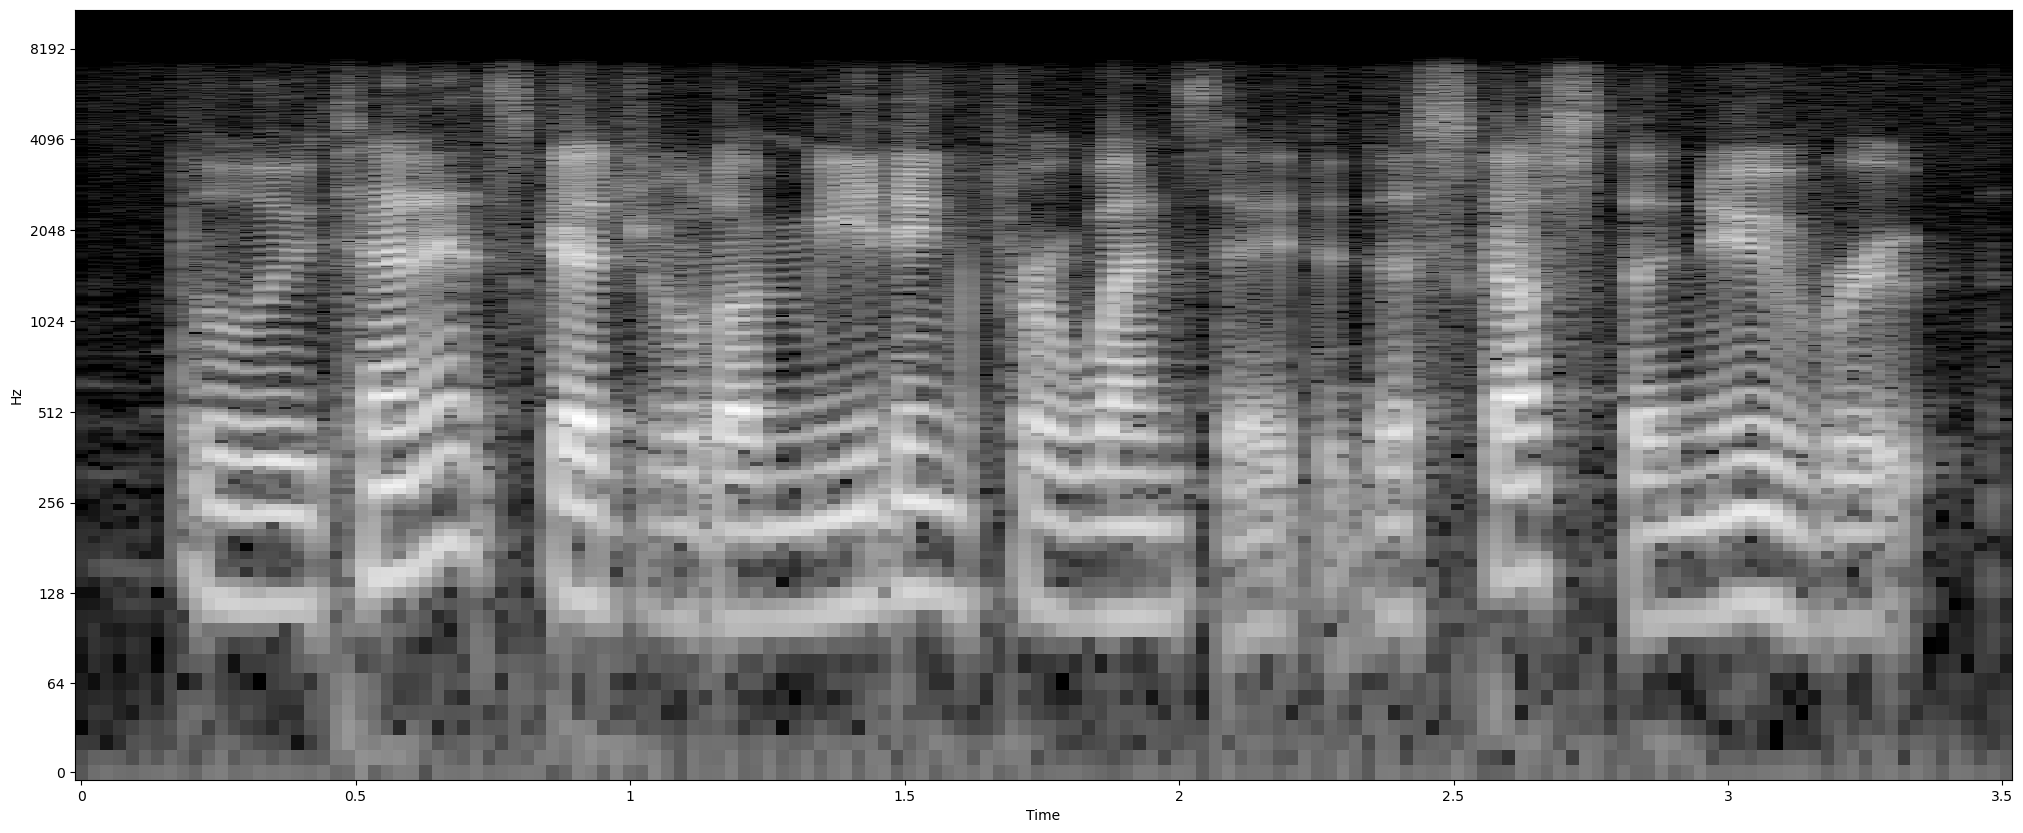

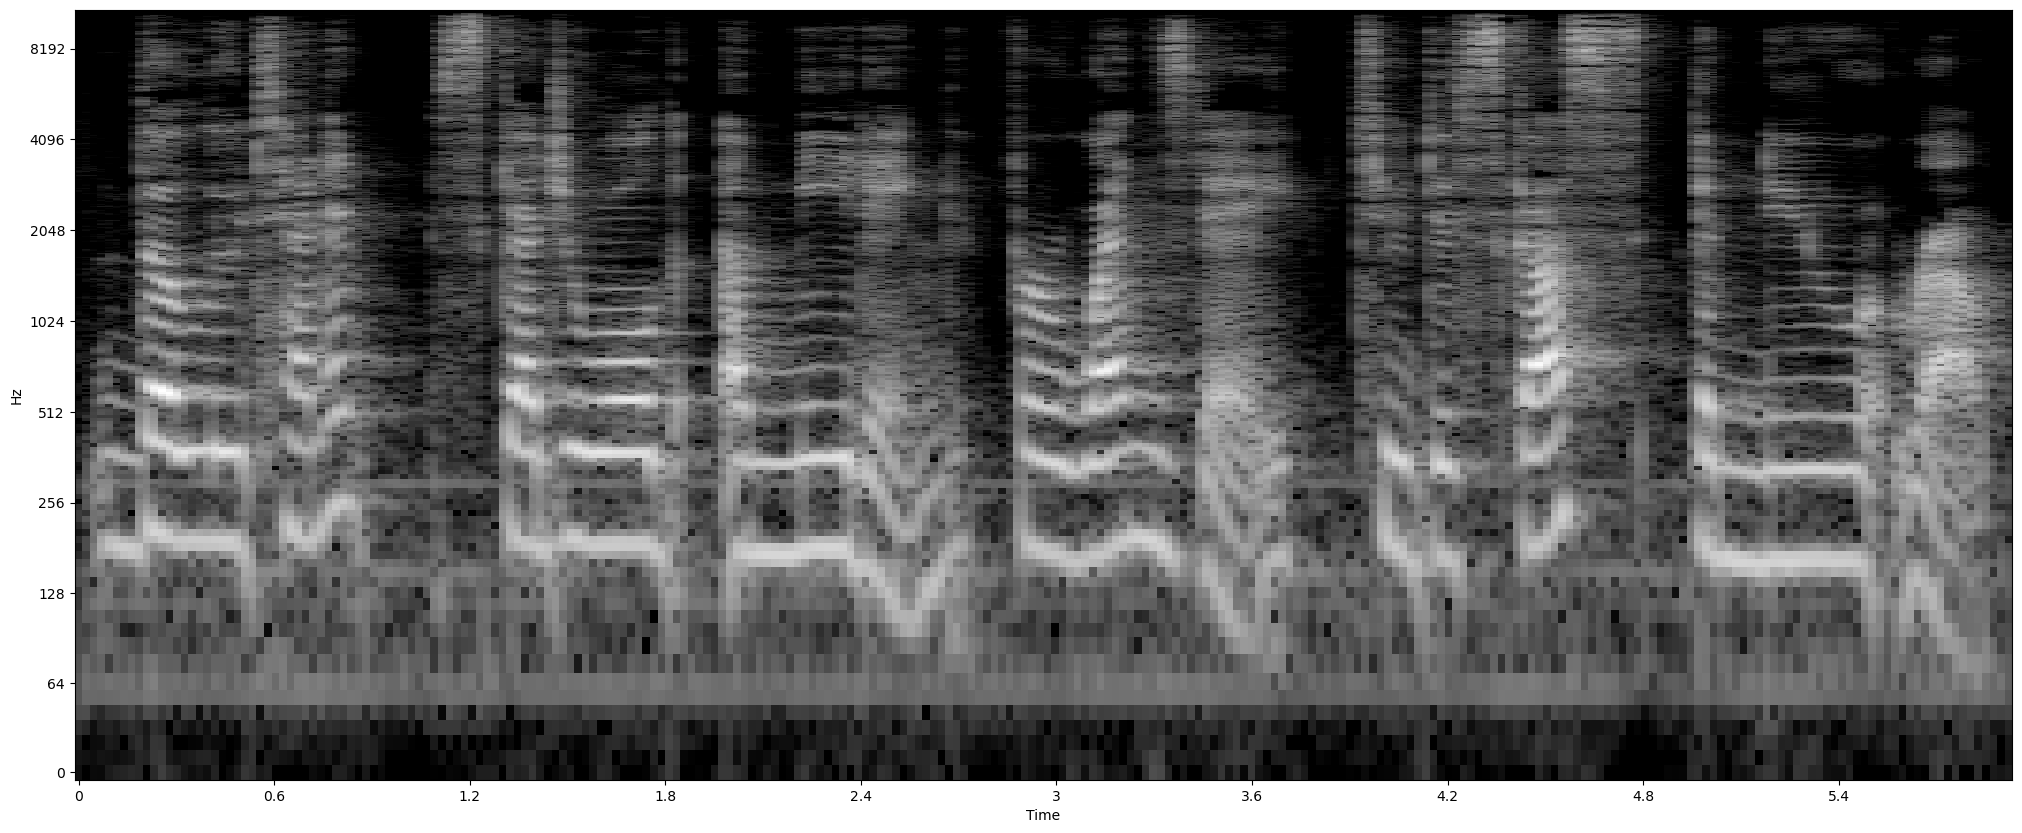

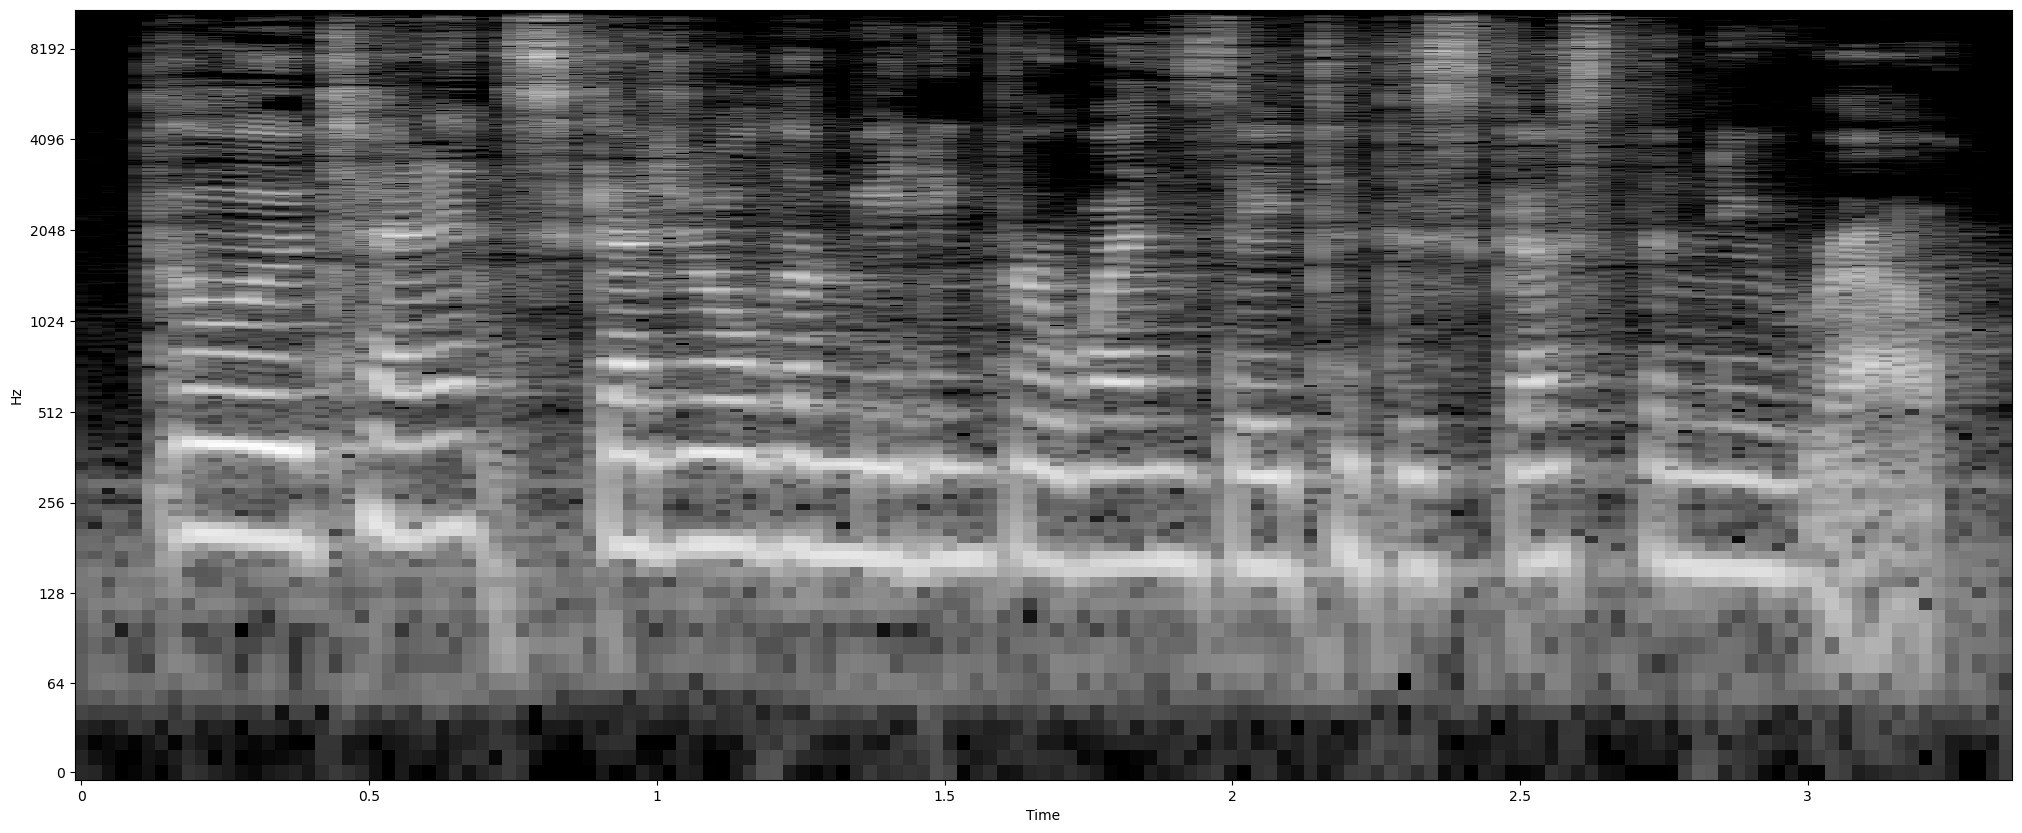

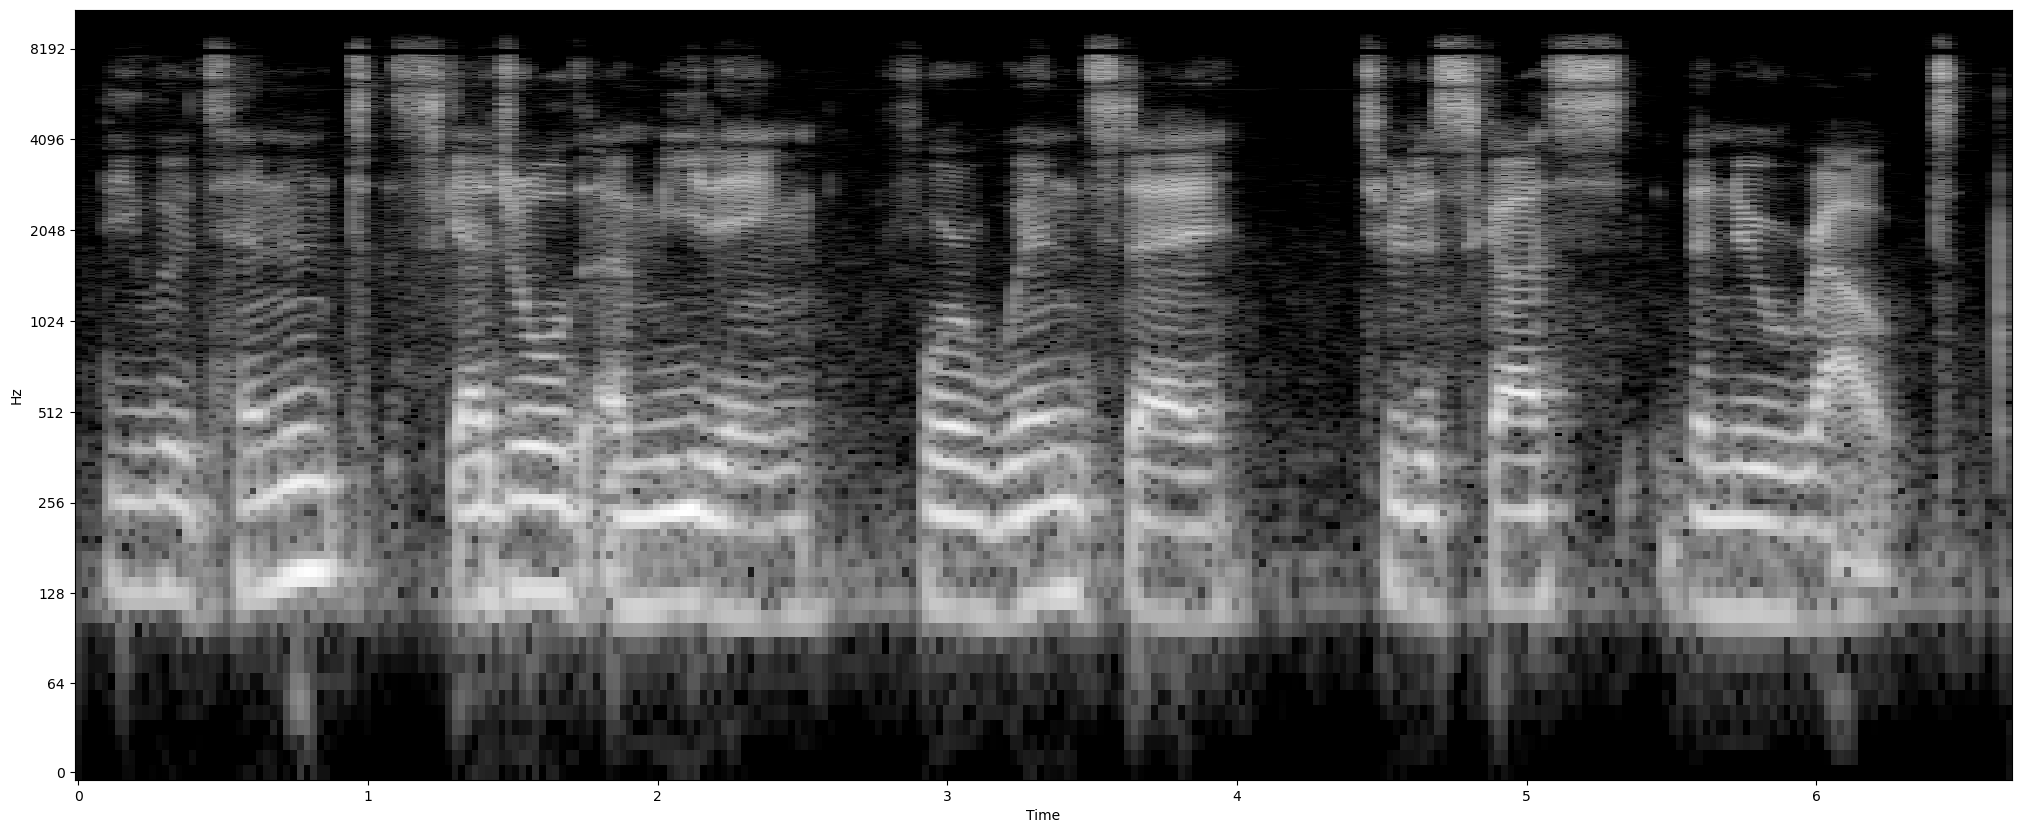

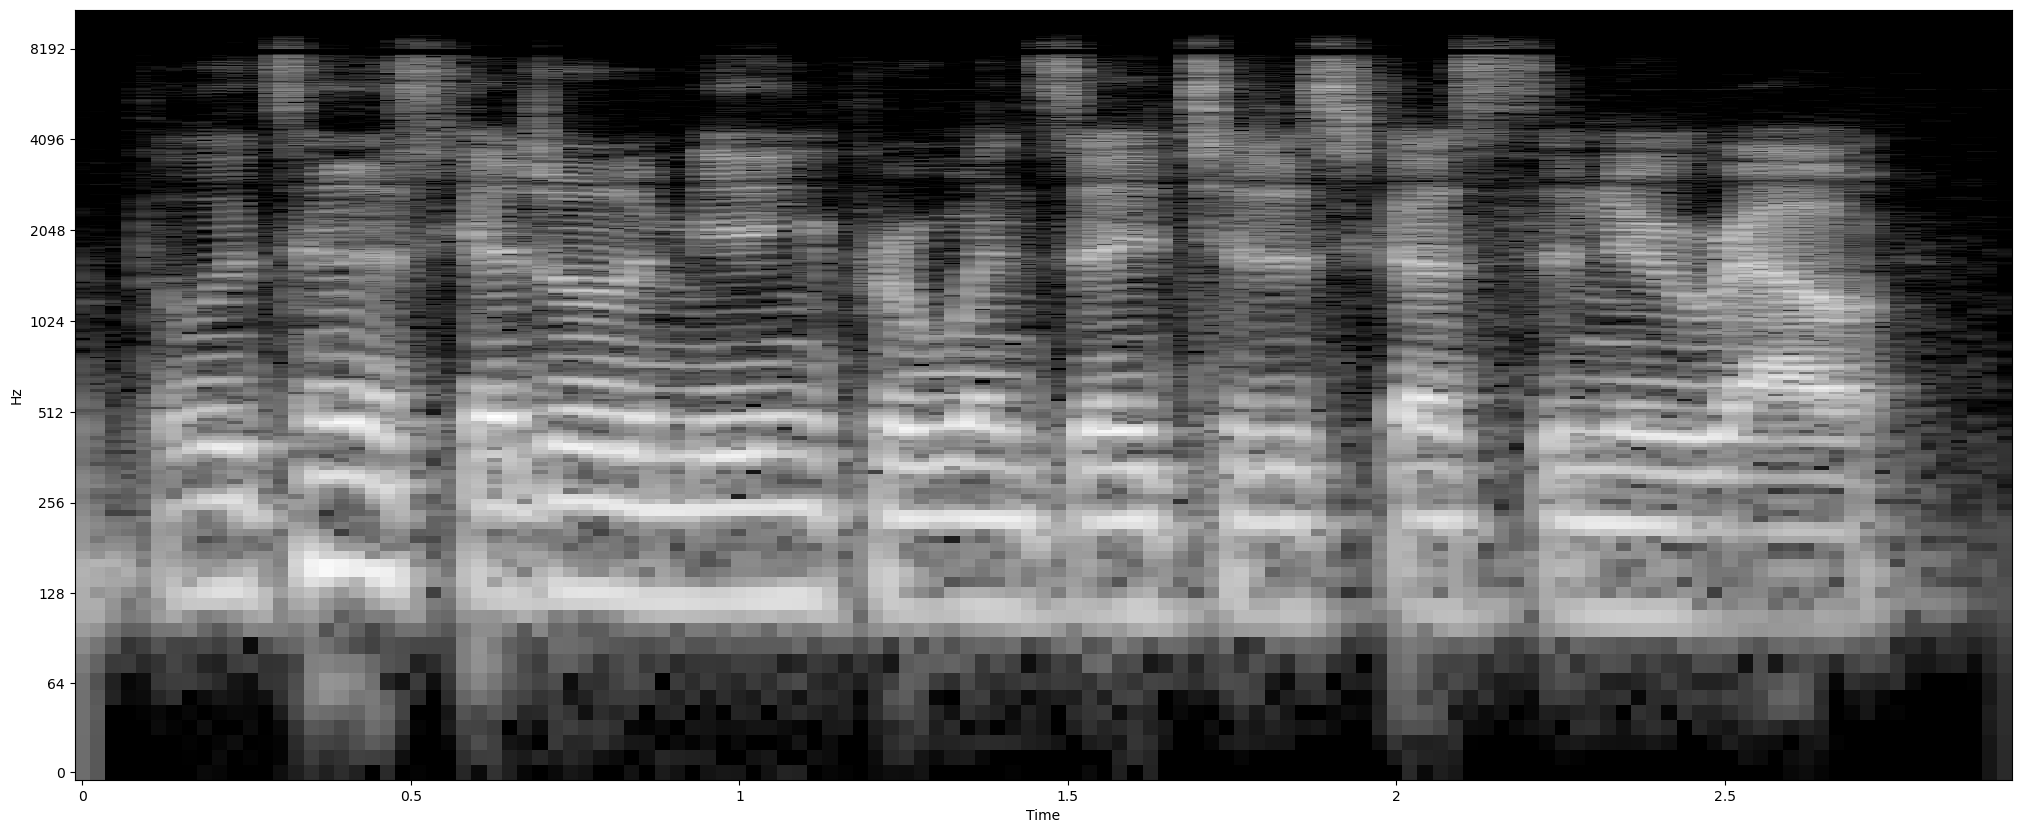

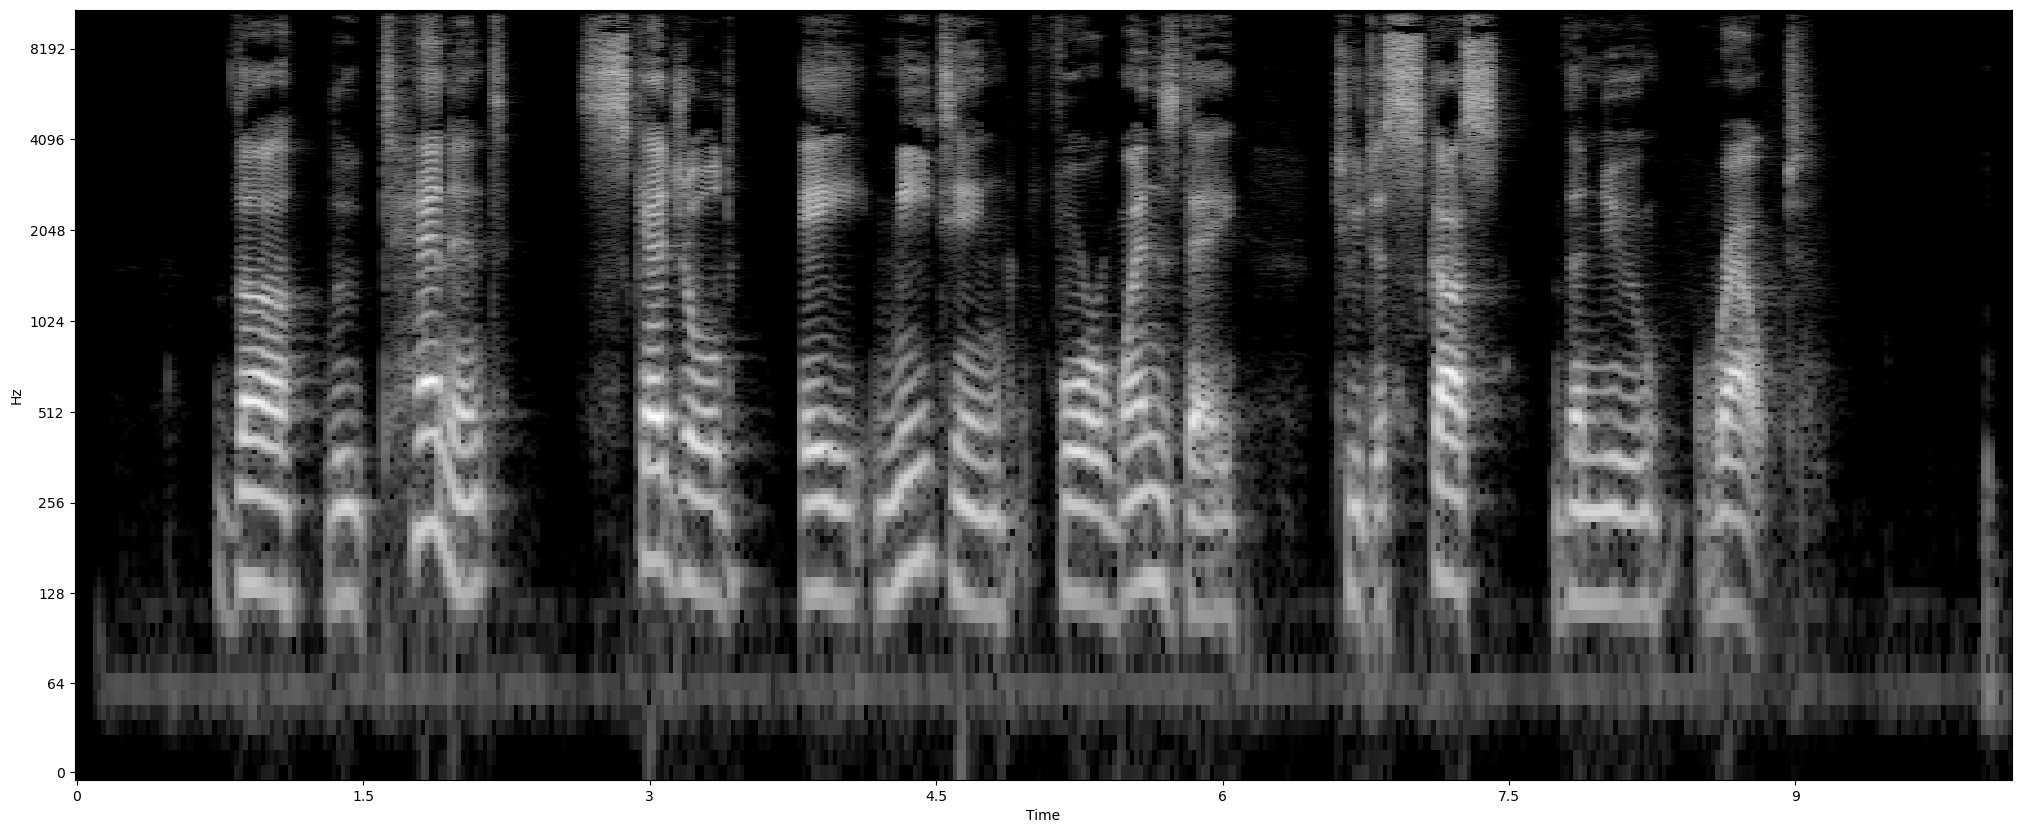

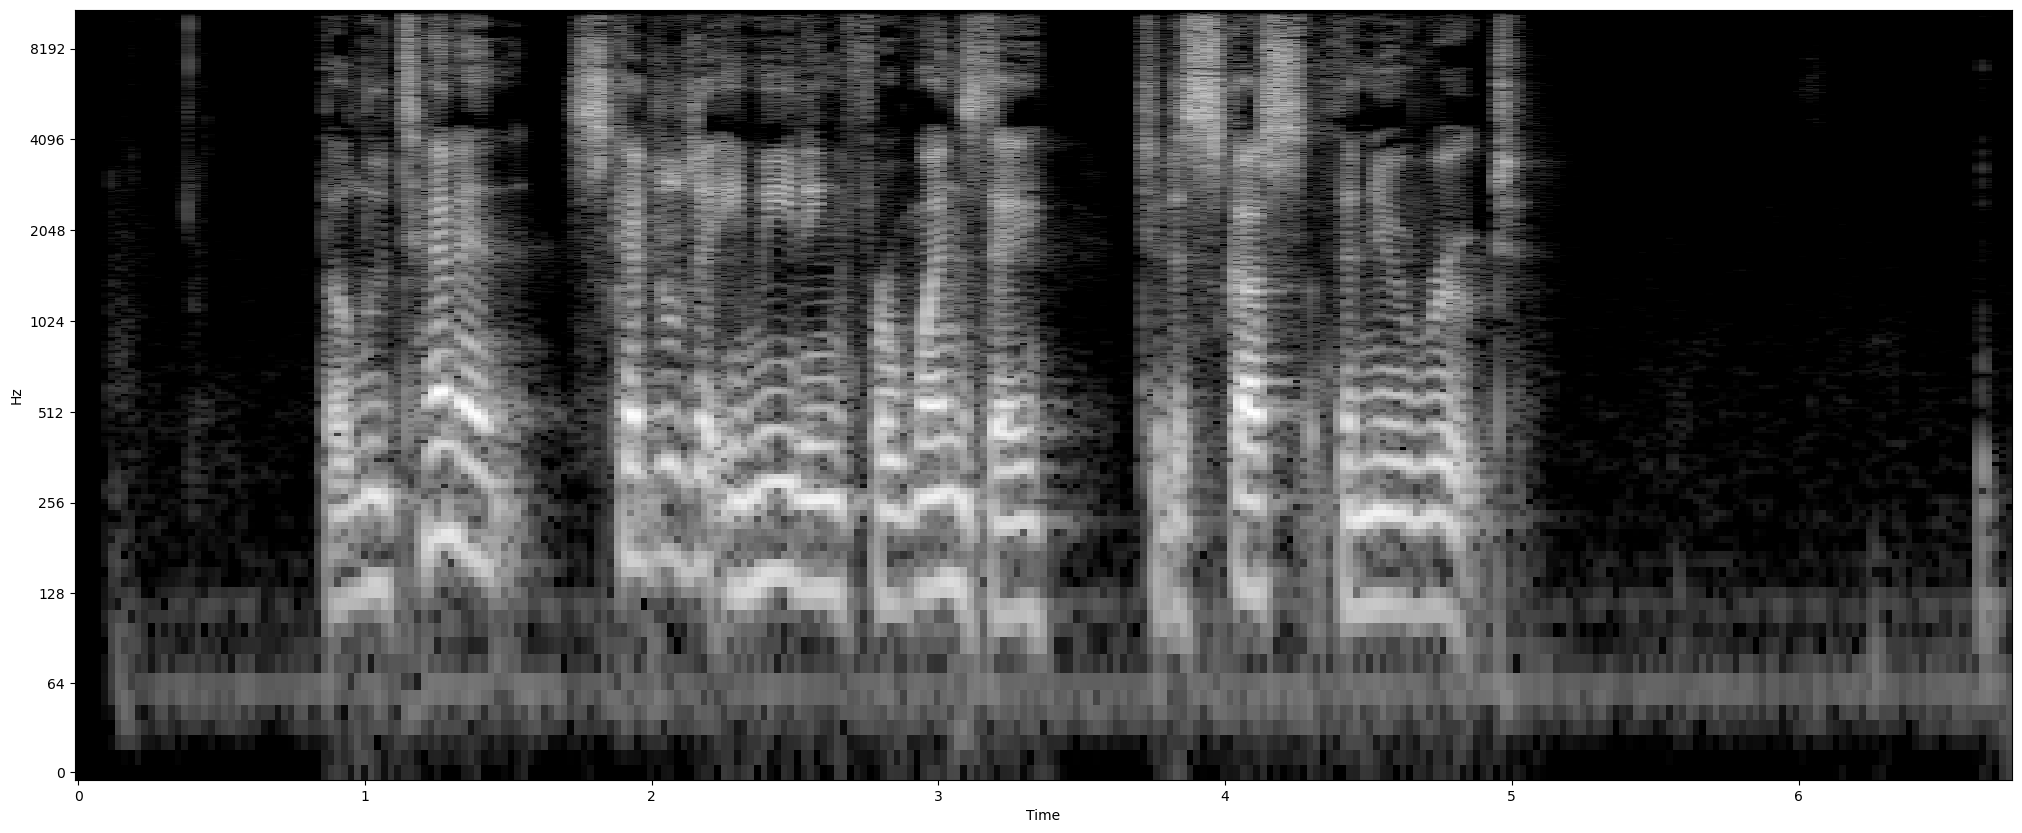

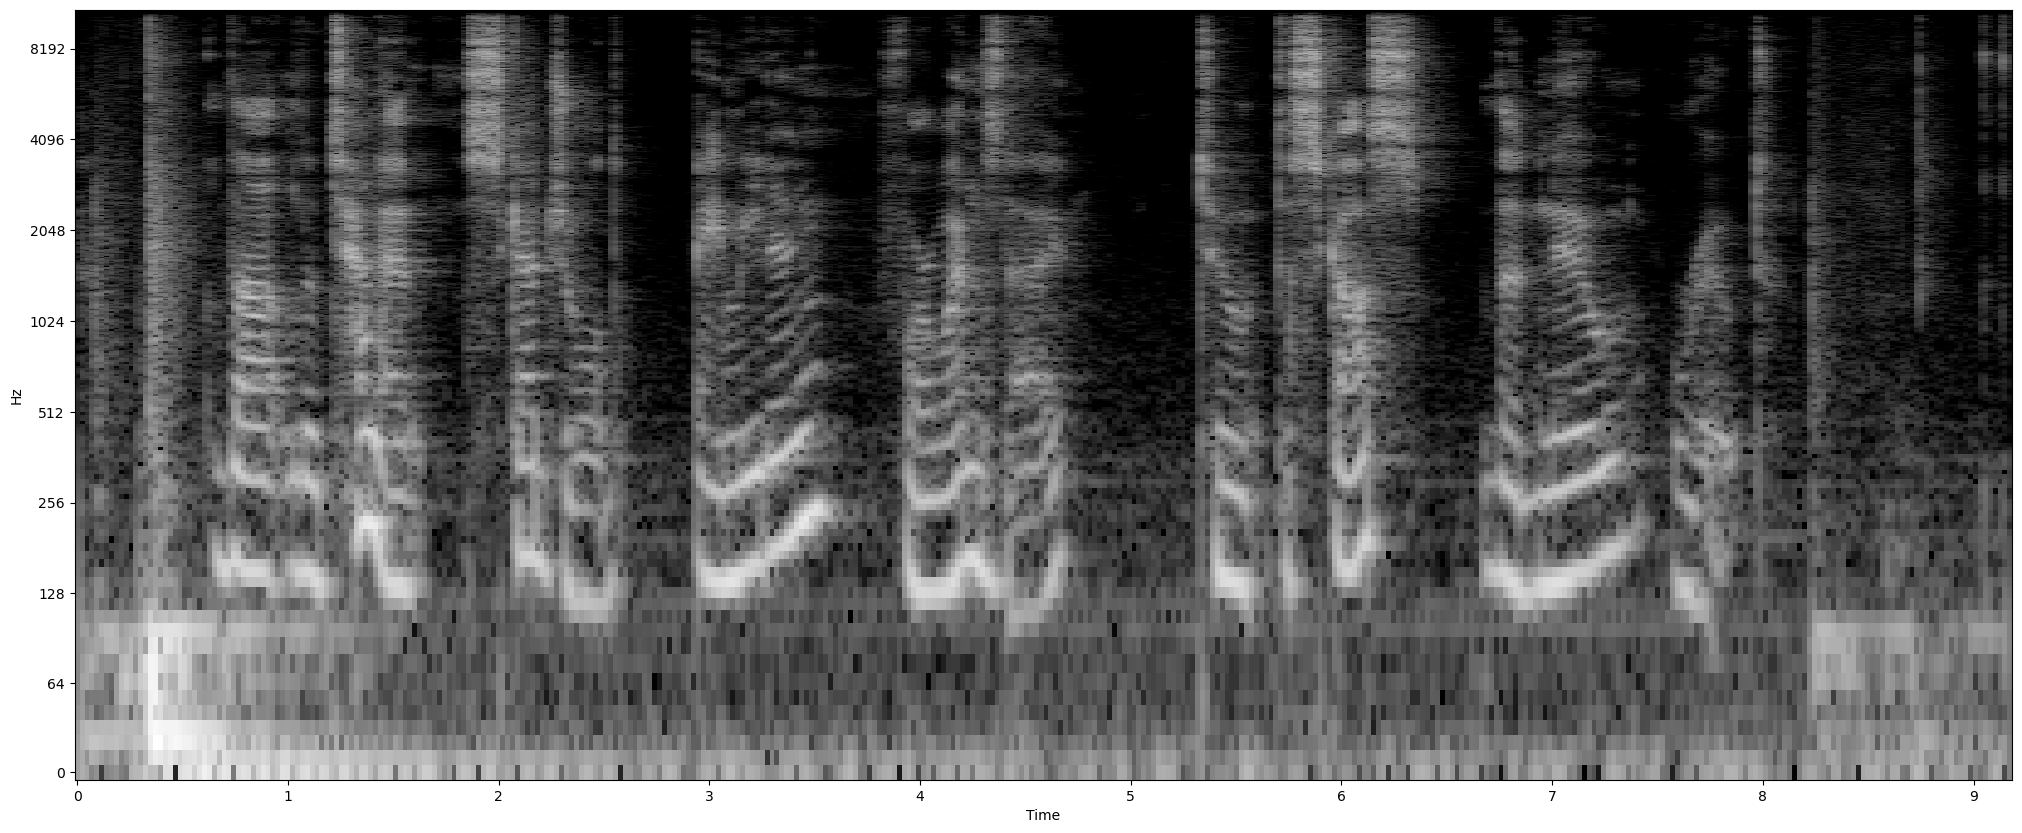

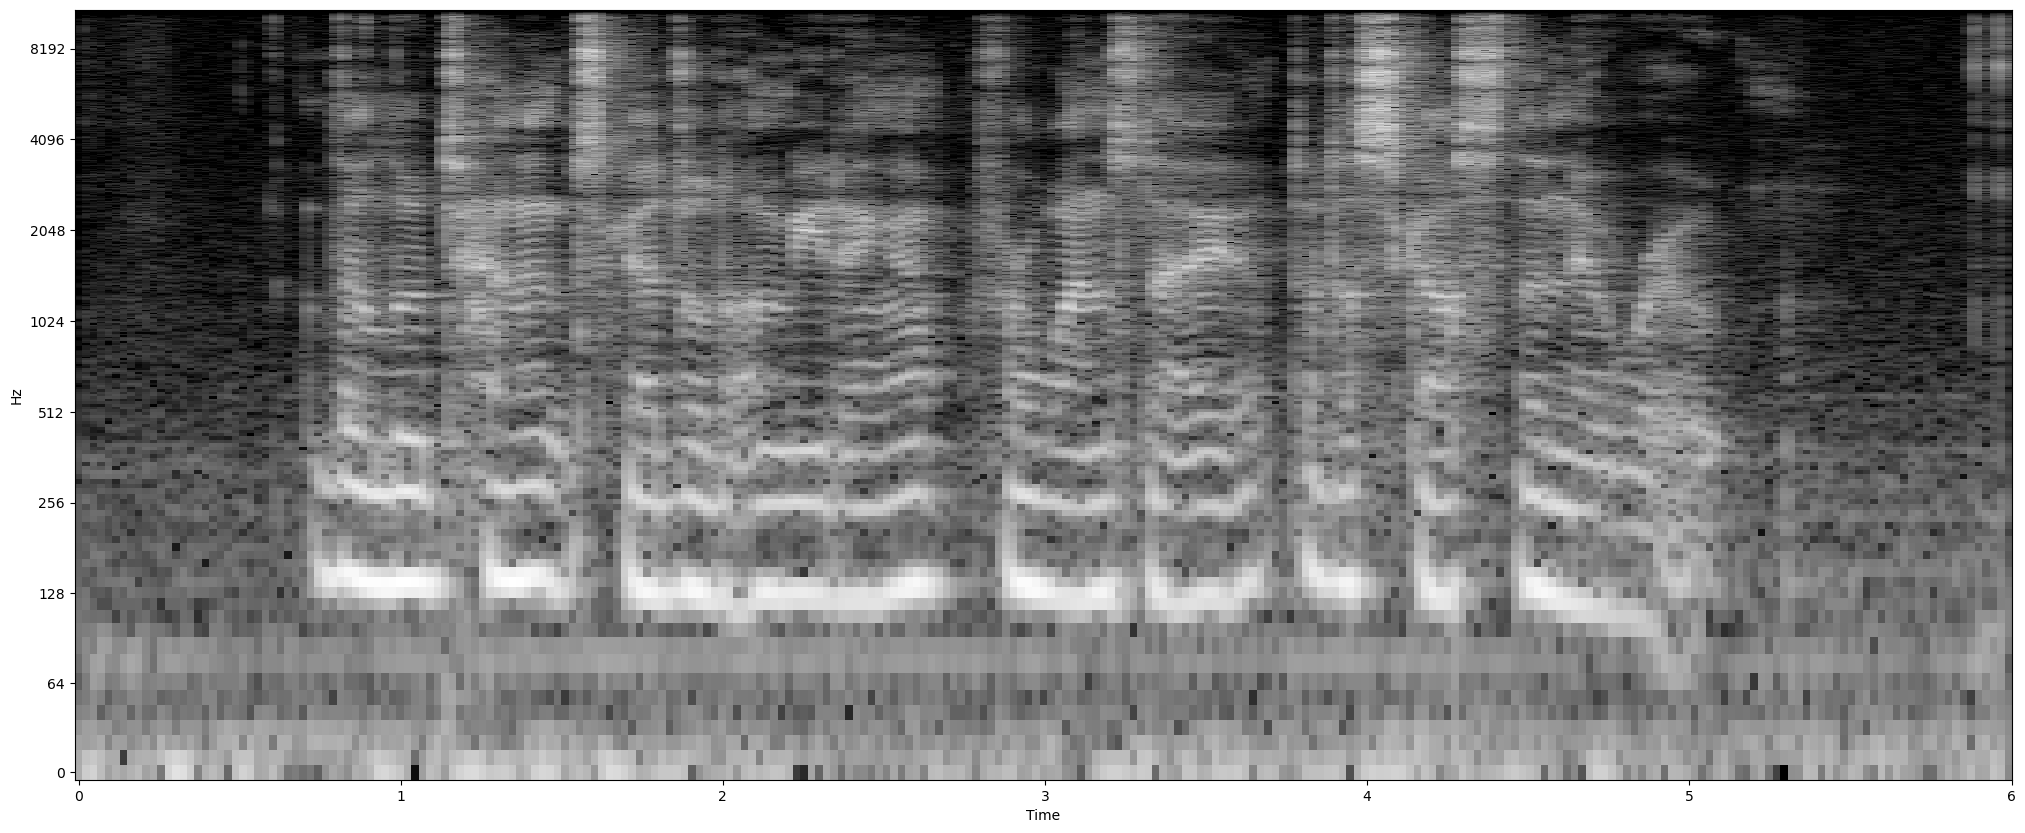

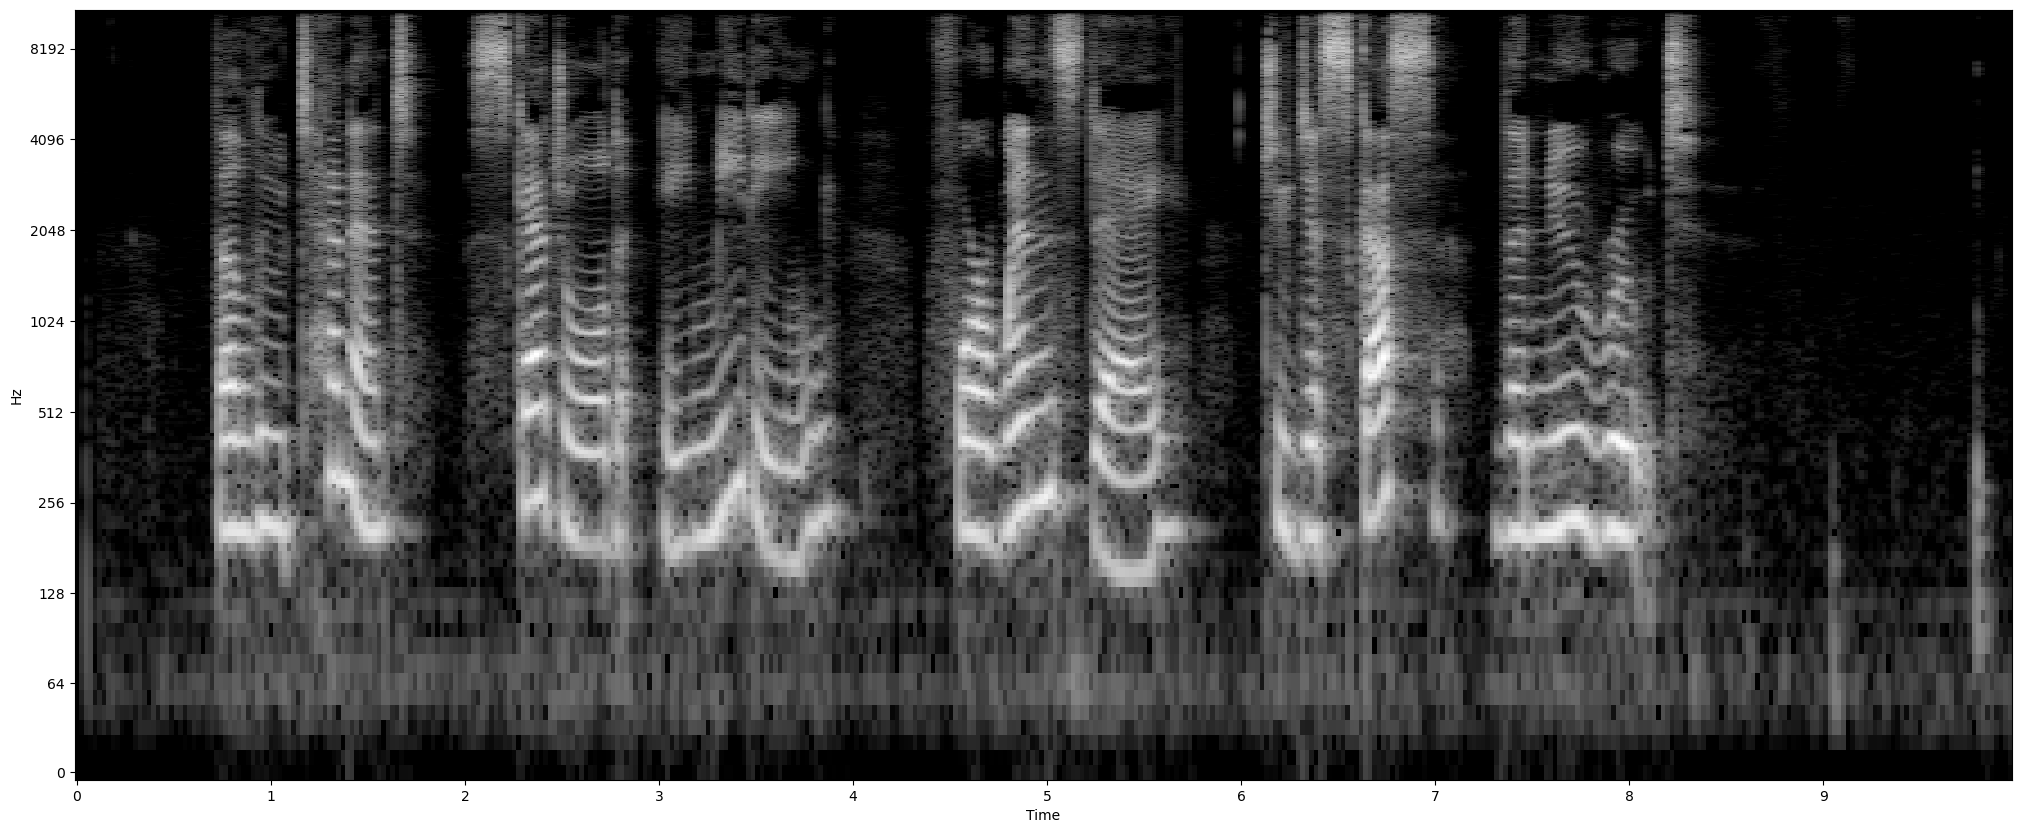

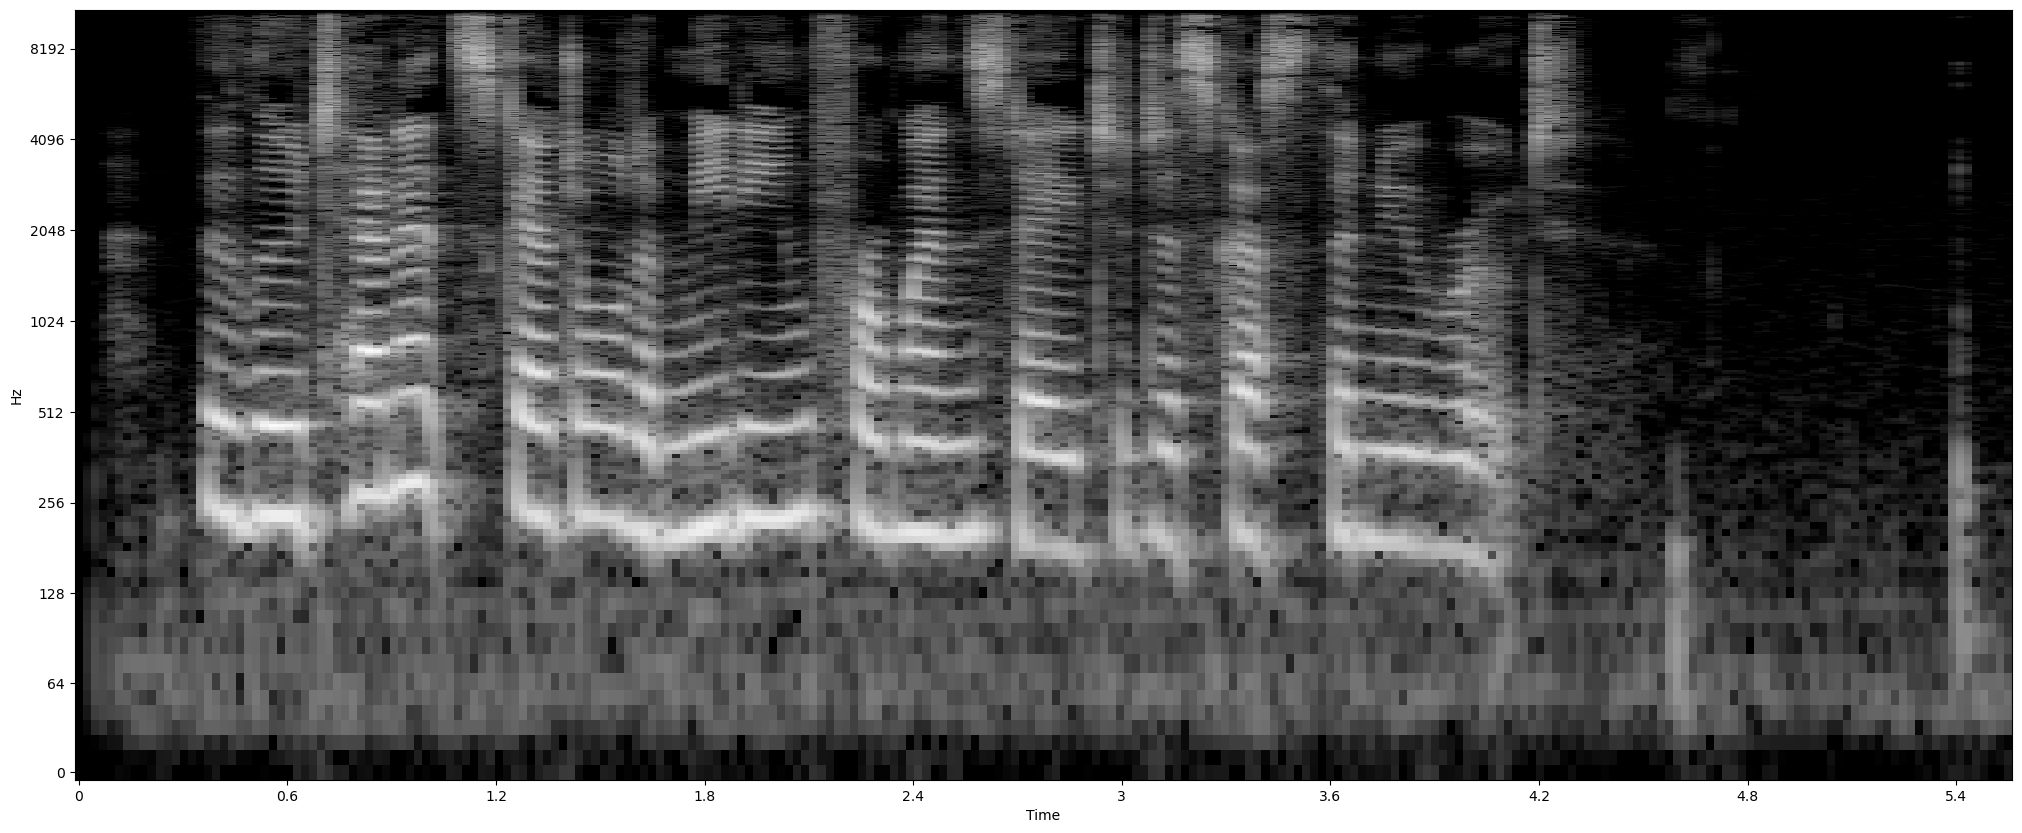

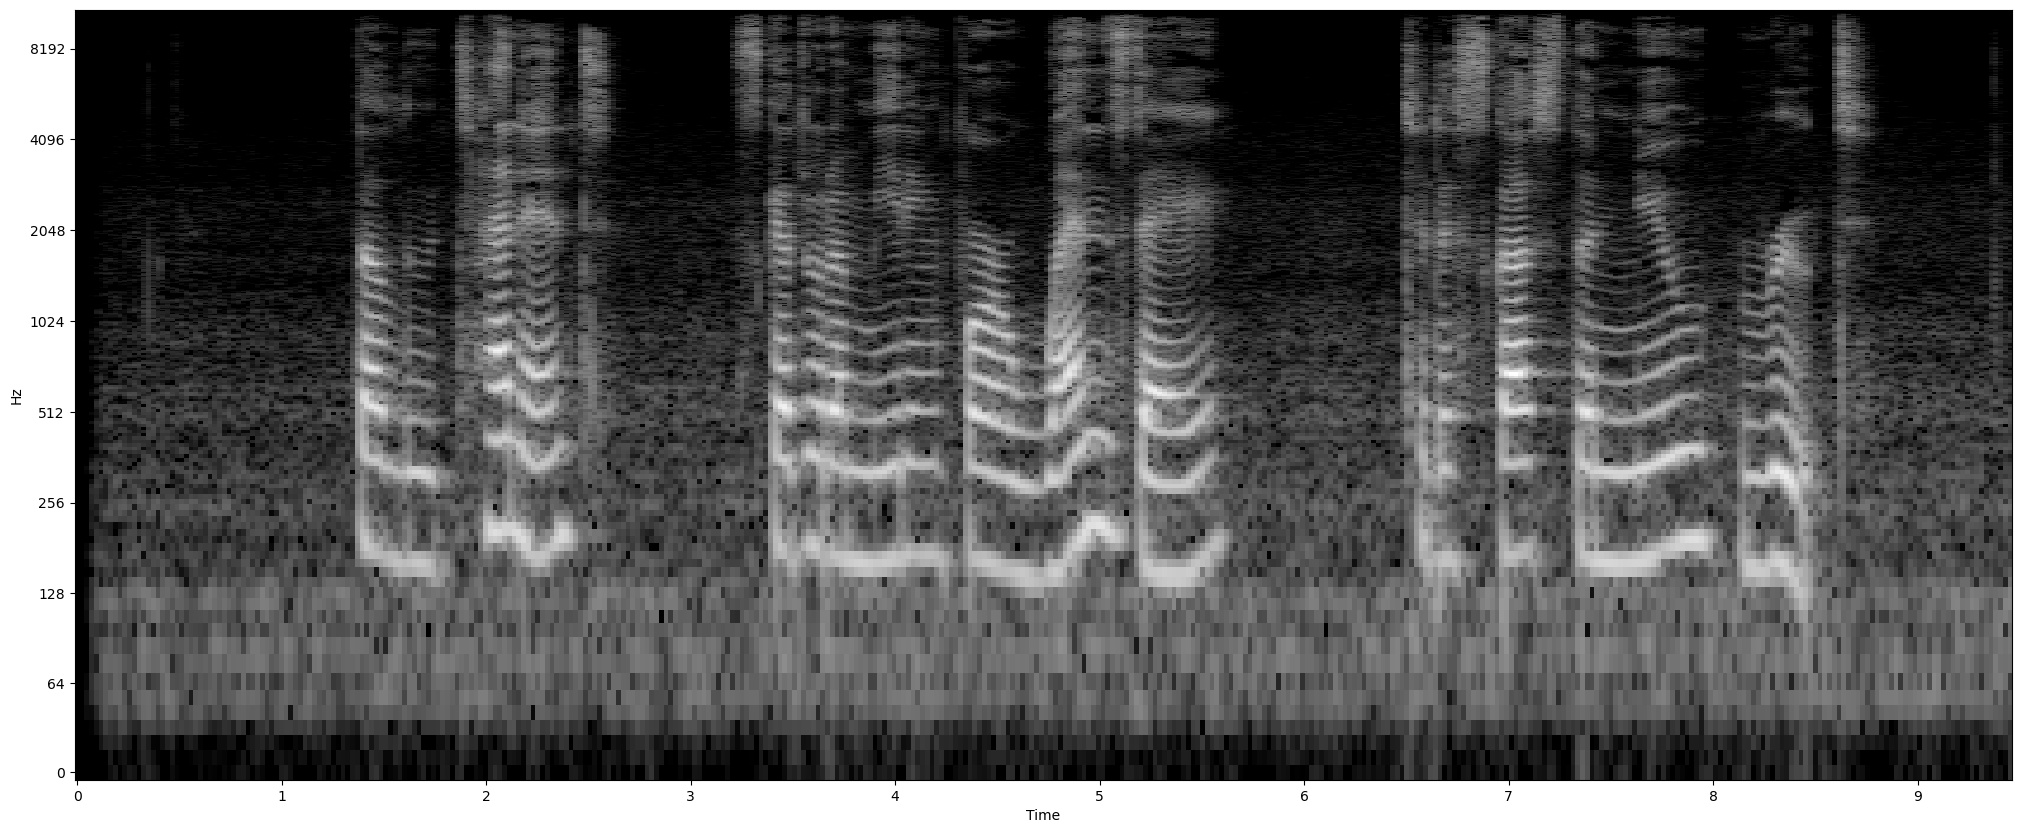

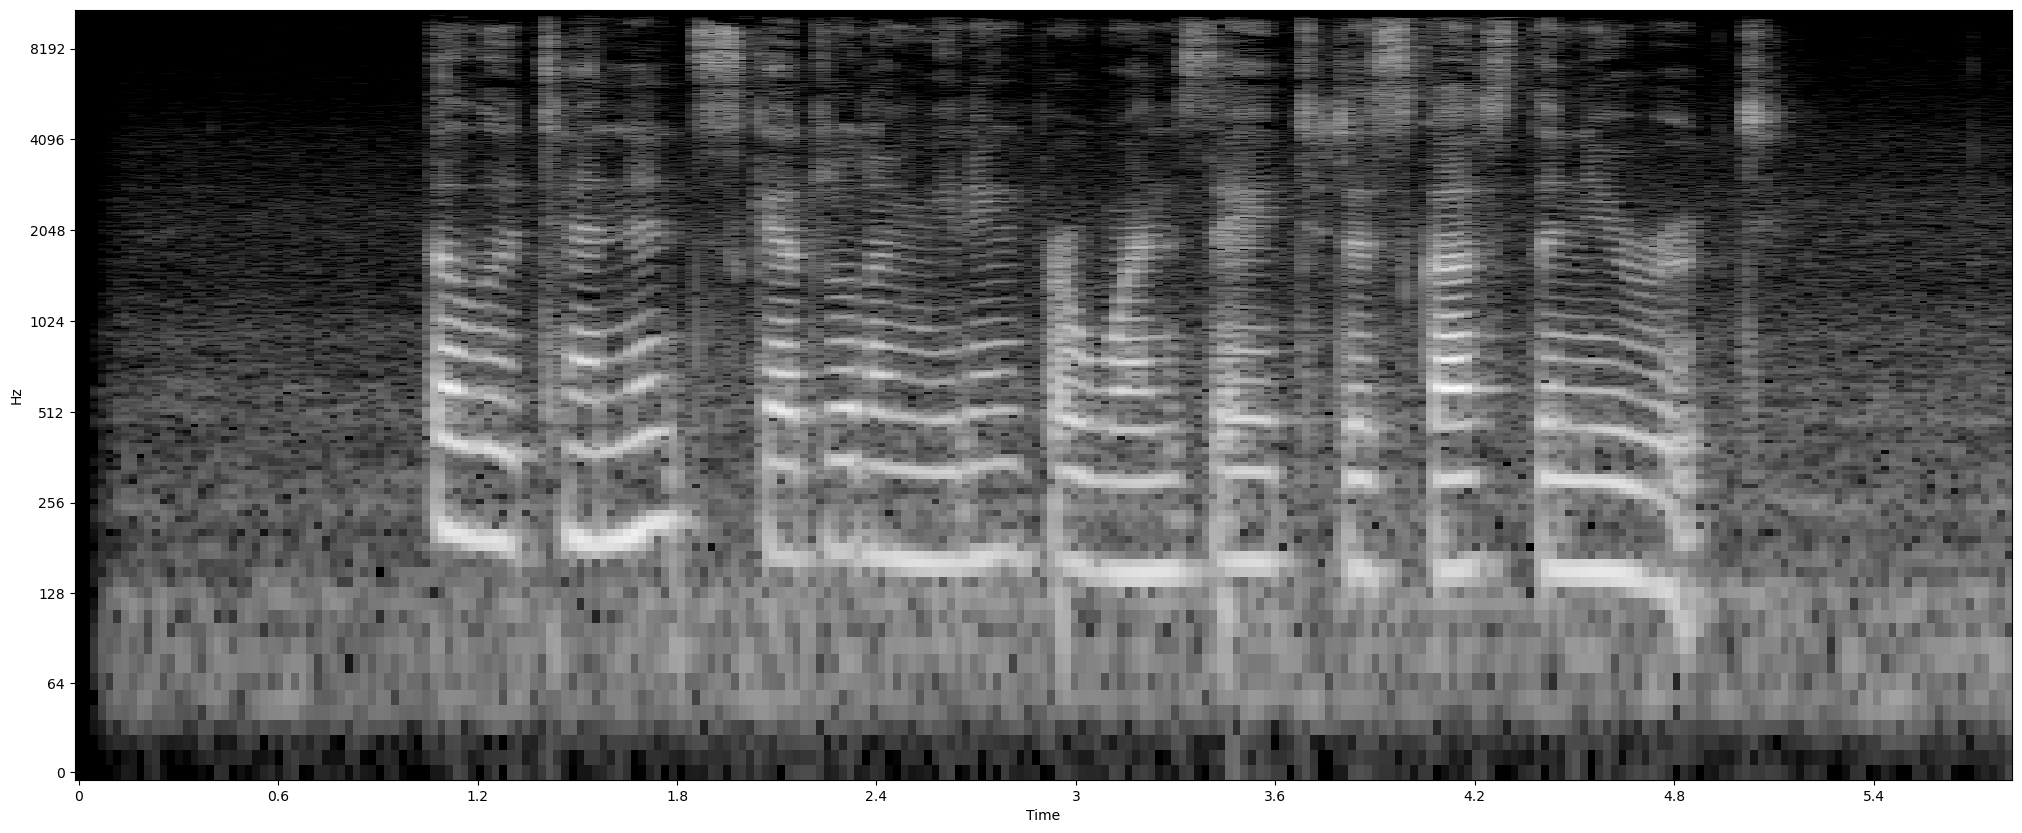

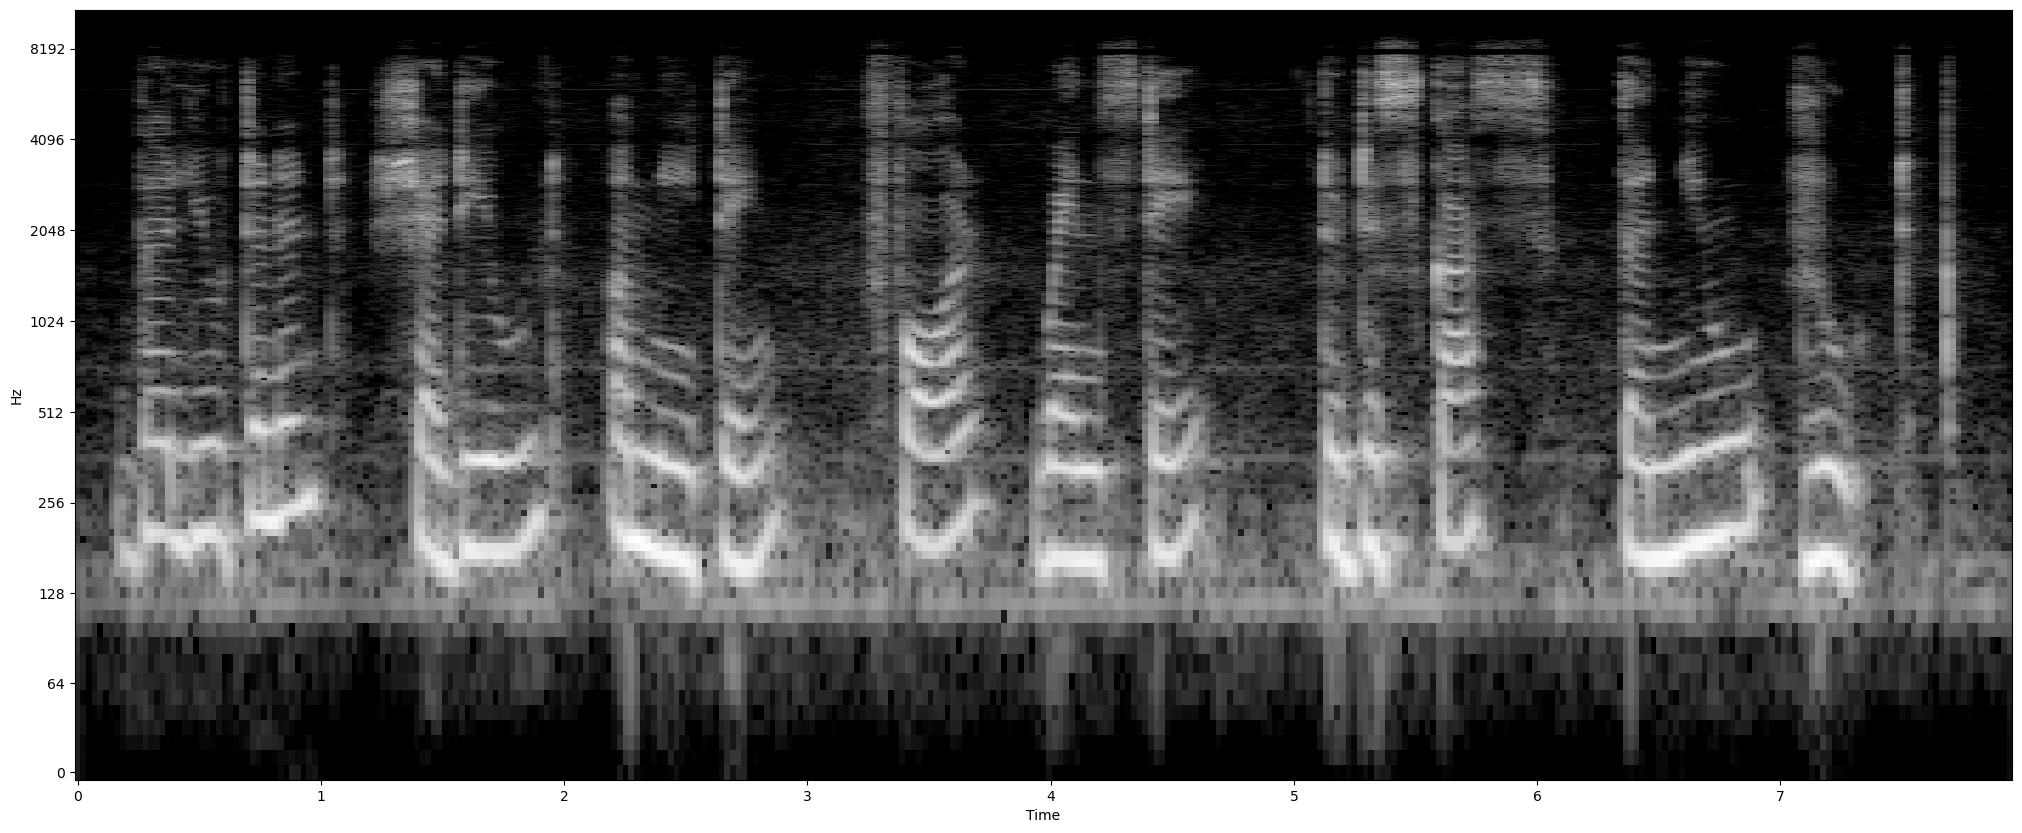

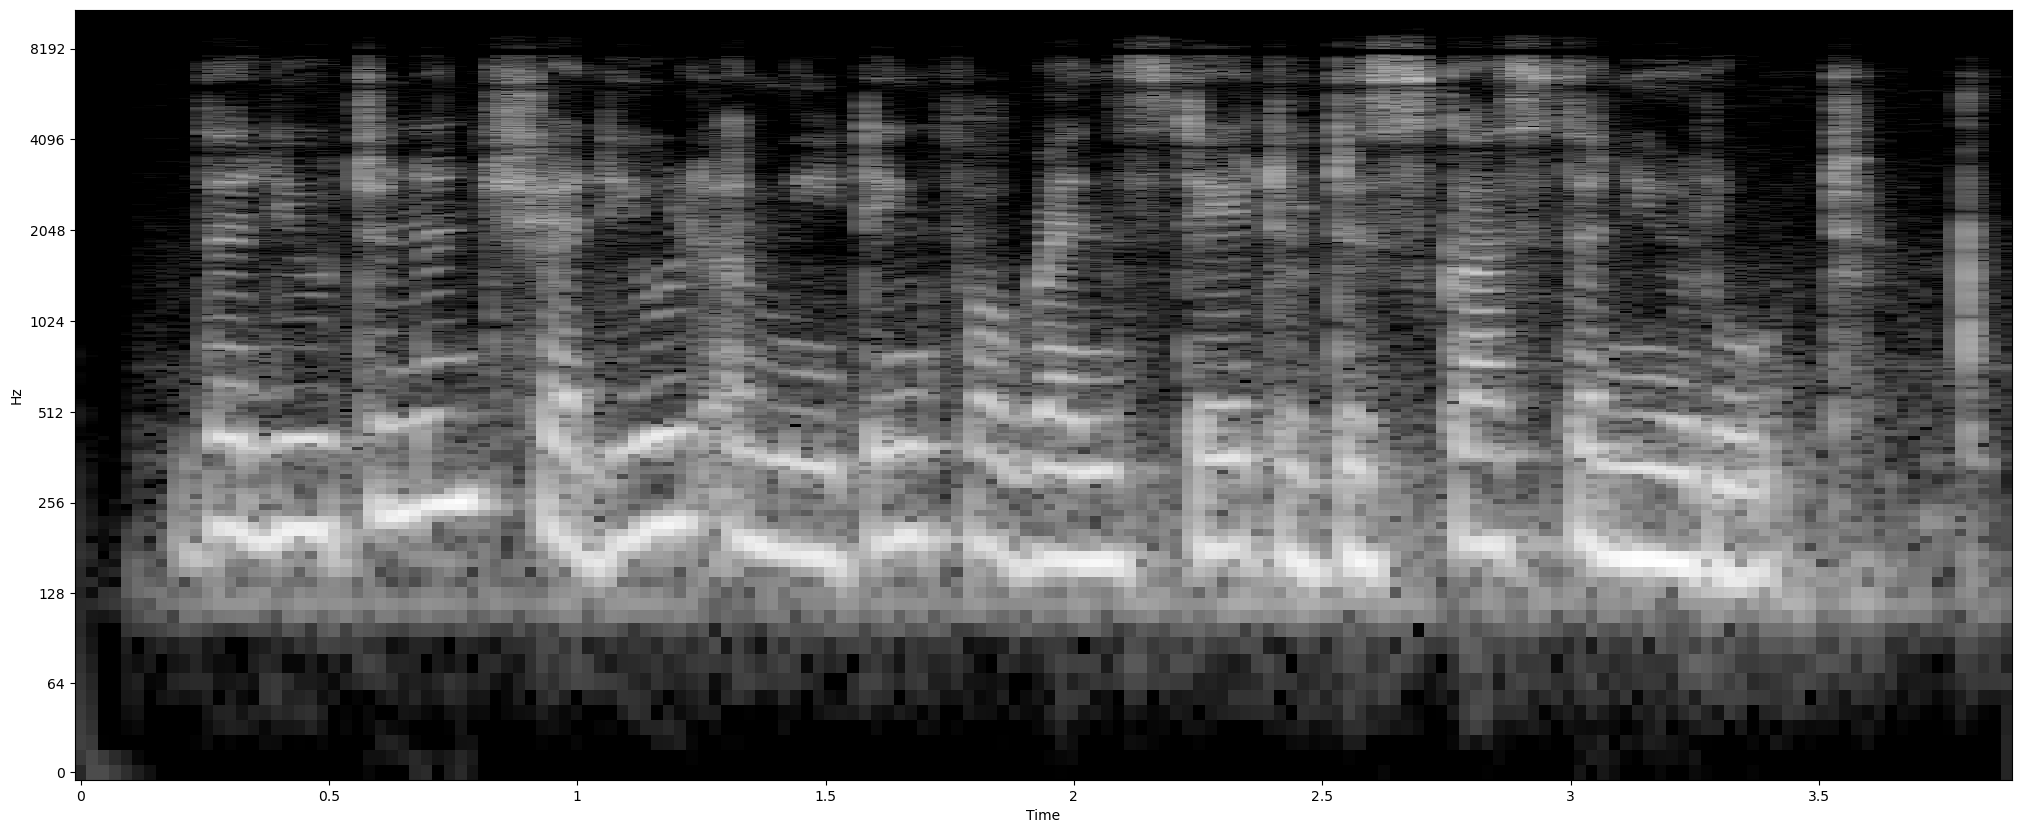

In [23]:
directory = 'audio/american'
classes = ['american', 'indian']
for classification in classes:
    directory = os.path.join('audio', classification)
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        Spectrogramify(classification, f)
    